#Category 2 MACHINE LEARNING

##Task 2: Disease Classification Model Using Public Health Data

##Loading the dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/content/healthcare_dataset.csv')

In [3]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


## Data cleaning

In [4]:
#Remove all unwanted white space from dataset
df = df.replace(r'\s+', ' ', regex=True)

In [5]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [6]:
# duplicated values
df.duplicated().sum()

0

In [7]:
df.shape

(10000, 15)

##EDA

In [8]:
# what percent of data is Abnormal ,Inconclusive and Normal
df['Test Results'].value_counts()

Abnormal        3456
Inconclusive    3277
Normal          3267
Name: Test Results, dtype: int64

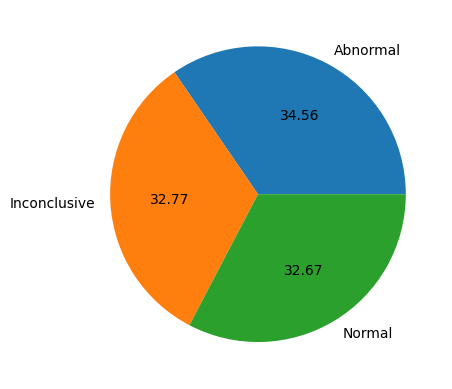

In [9]:
import matplotlib.pyplot as plt
plt.pie(df['Test Results'].value_counts(),labels=['Abnormal','Inconclusive','Normal'],autopct='%0.2f')
plt.show()


In [10]:
#Dividing dataset into numerical columns and categorical columns
df1=df.copy()
#Separating numerical and categorical columns
num=[]
cat=[]
for col in df1.columns:
    if pd.api.types.is_numeric_dtype(df1[col]):
        num.append(col)
    elif pd.api.types.is_object_dtype(df1[col]):
        cat.append(col)

print('Numerical columns : ',num)
print('Categorical columns : ',cat)

Numerical columns :  ['Age', 'Billing Amount', 'Room Number']
Categorical columns :  ['Name', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Admission Type', 'Discharge Date', 'Medication', 'Test Results']


In [11]:
import seaborn as sns

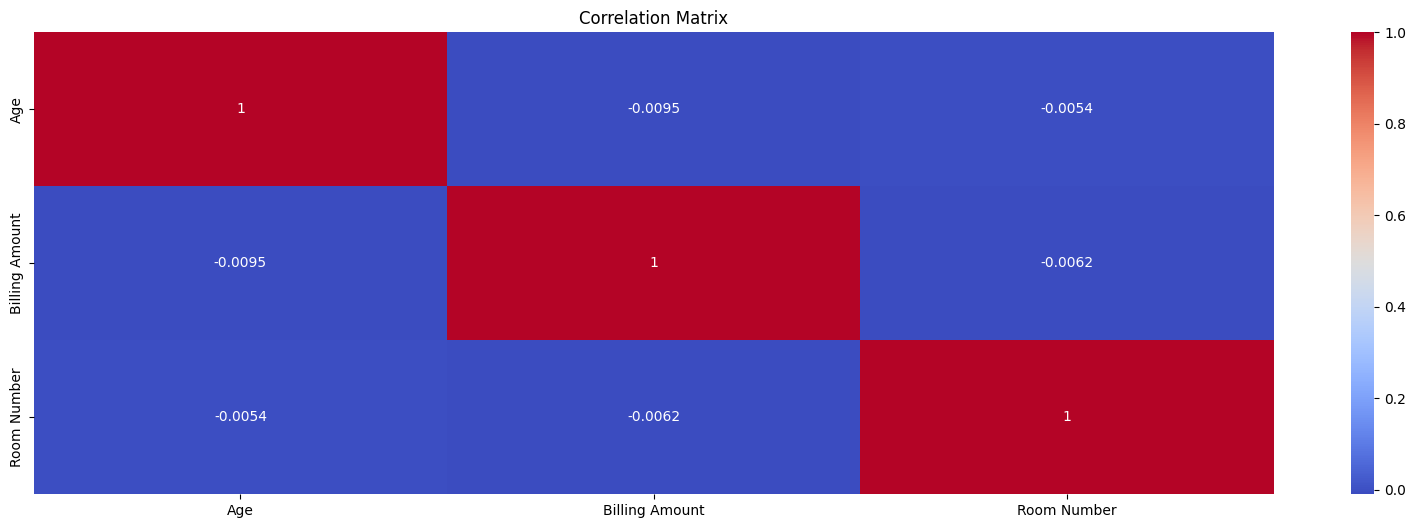

In [12]:
# Calculate the correlation matrix
numerical_columns = df.select_dtypes(include=['int64','float64']).corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(numerical_columns, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

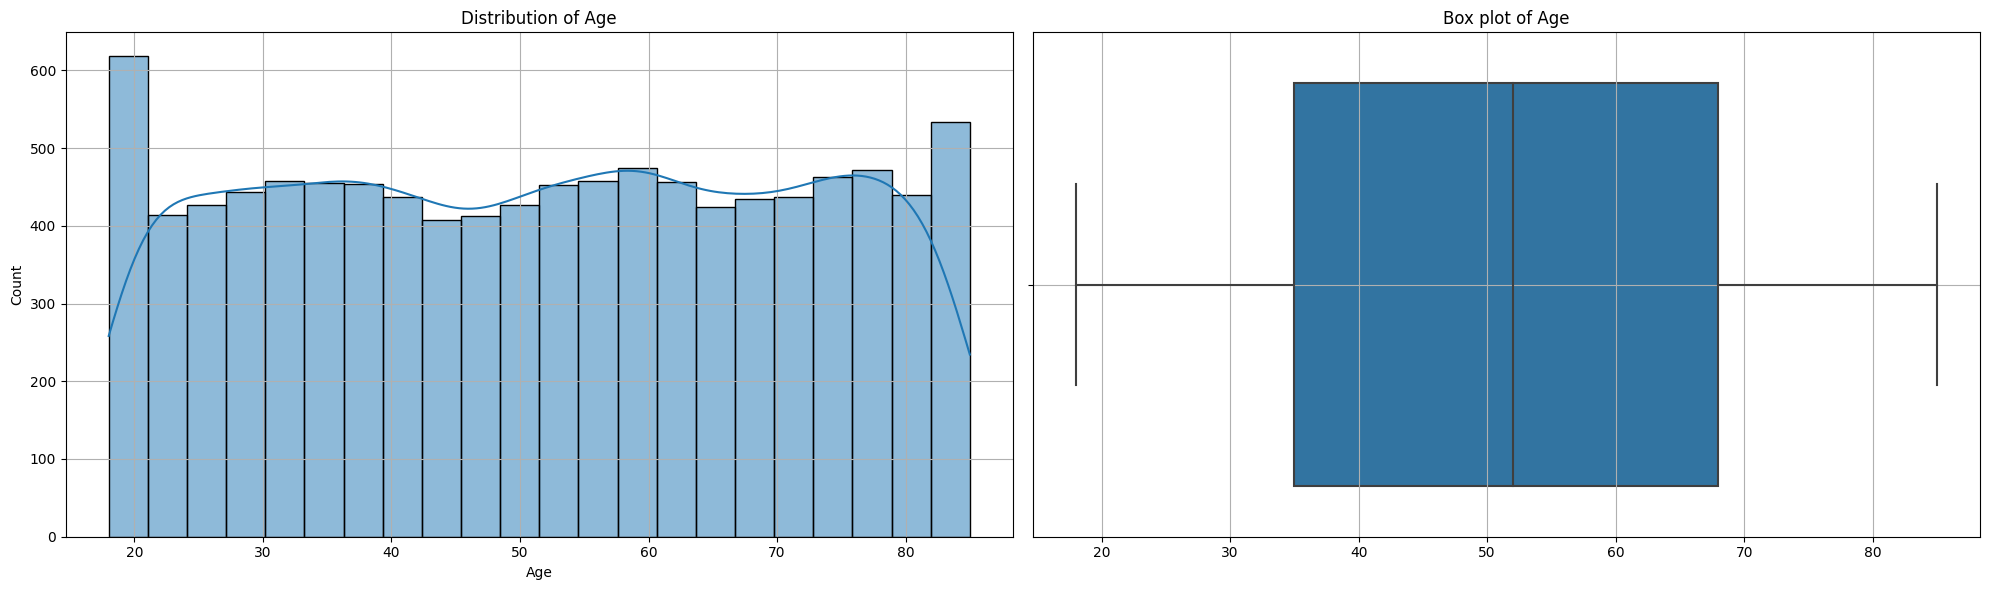

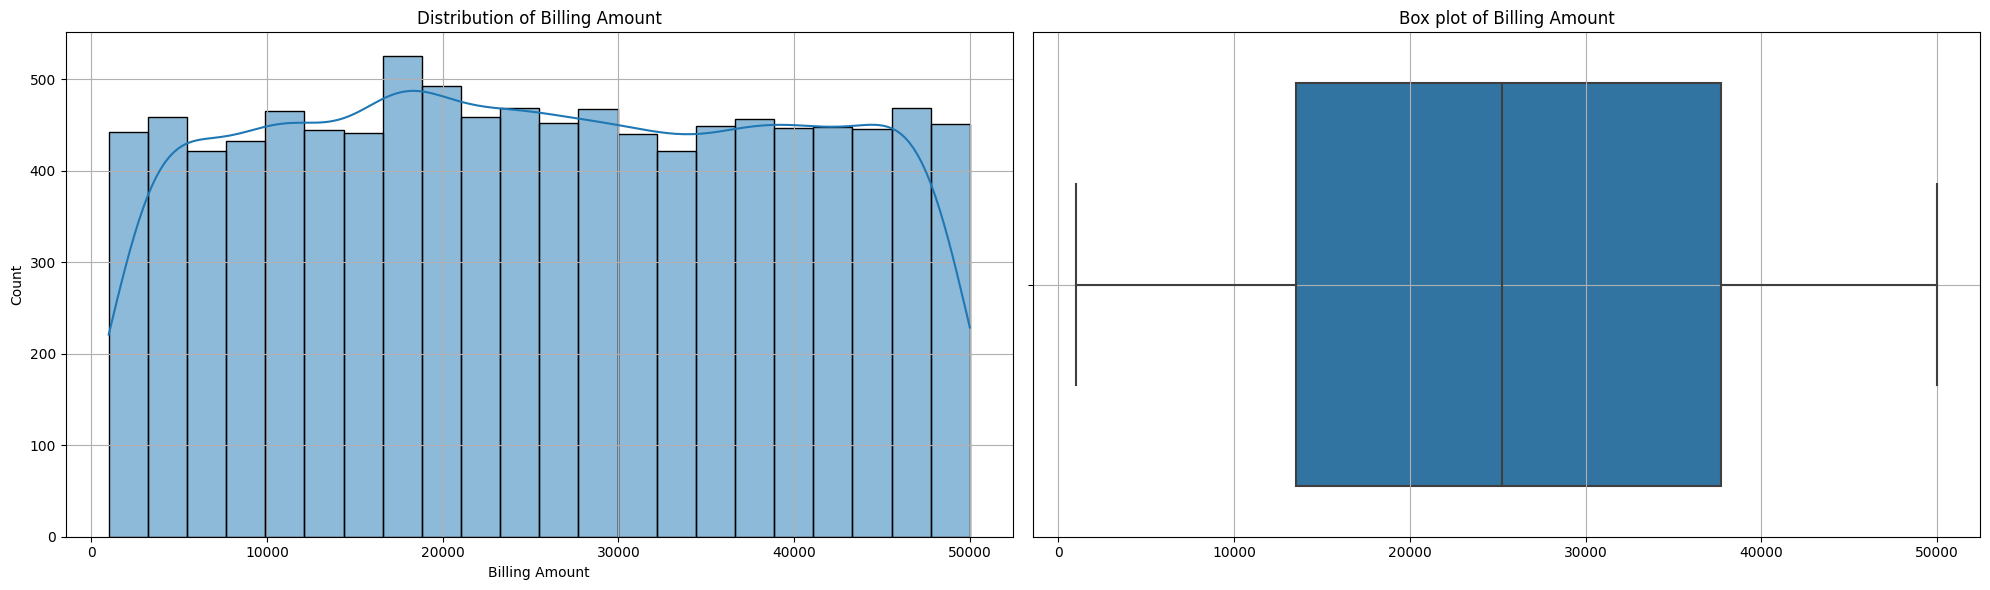

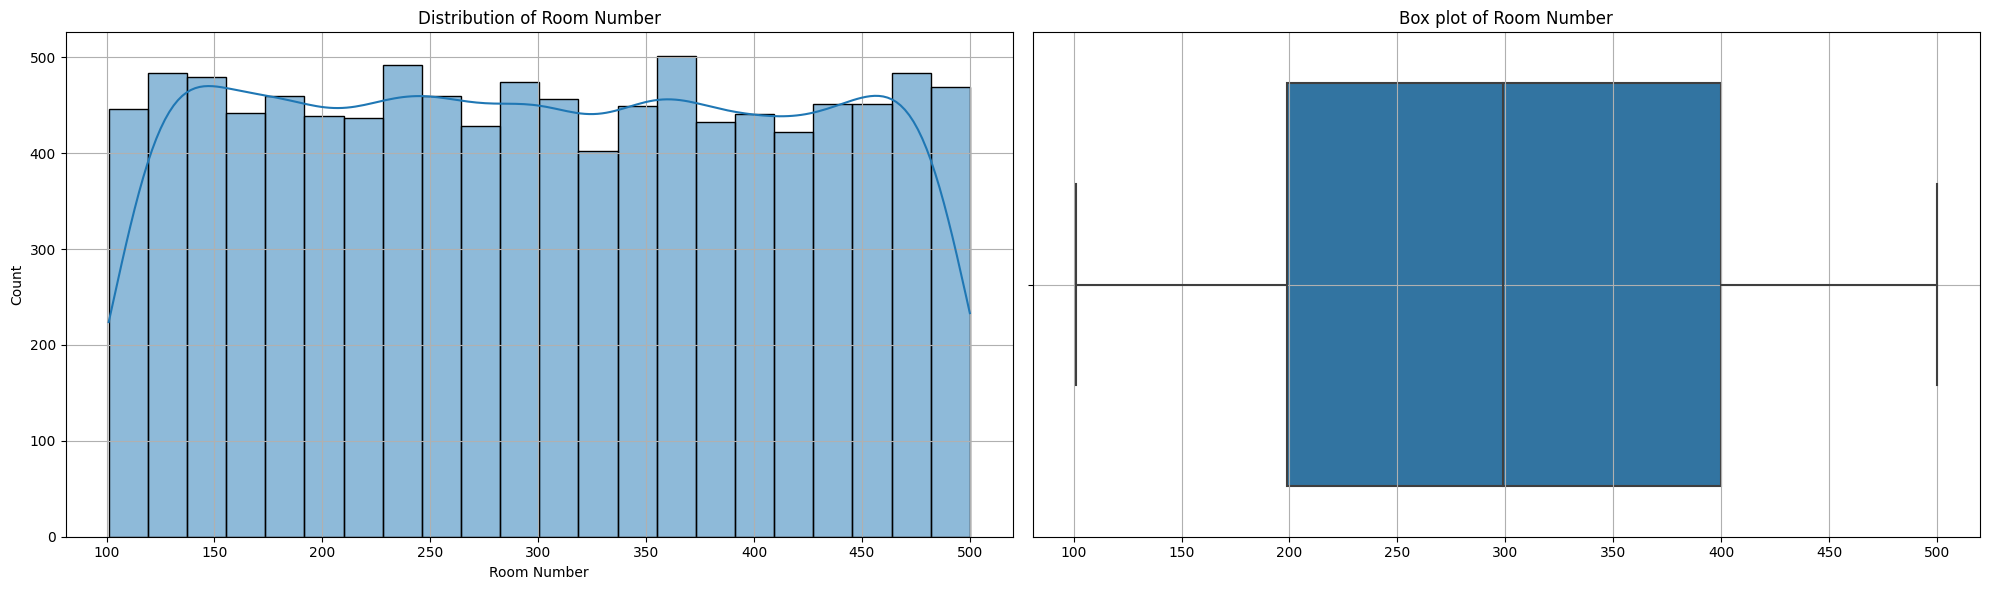

In [13]:
#Numerical column analysis
for i in num:
    fig,axes=plt.subplots(1,2,figsize=(20,6))

    sns.histplot(df1[i],kde=True,ax=axes[0])
    axes[0].set_title(f'Distribution of {i}')
    axes[0].grid(True)
    axes[1].set_xlabel('')

    sns.boxplot(x=df1[i],ax=axes[1])
    axes[1].set_title(f'Box plot of {i}')
    axes[1].grid(True)
    axes[1].set_xlabel('')

    plt.tight_layout()
    plt.show()

Univariate

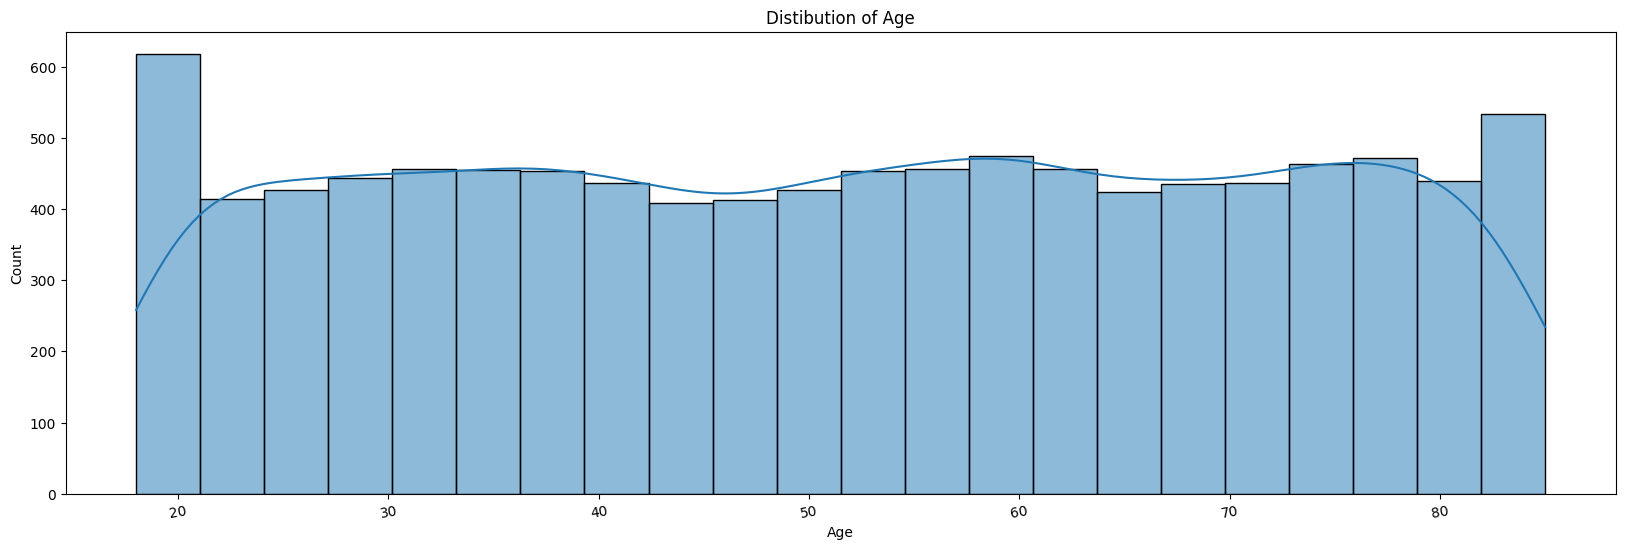

In [14]:
#Hist plot for Quantity
plt.figure(figsize=(20,6))
sns.histplot(data=df['Age'],kde=True)
plt.title('Distibution of Age')
plt.xticks(rotation=10)
plt.show()

In [15]:
pip install numerize


  Preparing metadata (setup.py) ... done
  Created wheel for numerize: filename=numerize-0.12-py3-none-any.whl size=3157 sha256=7d593c3123c39909708d63a988d647ab8aa432422ac7db575a9e978b7043e78c
  Stored in directory: /root/.cache/pip/wheels/87/84/e1/9e30f2e3da6590acb0f1c03a806e2673d2f9e7f5bd2b11589a
Successfully built numerize


In [16]:
import numerize

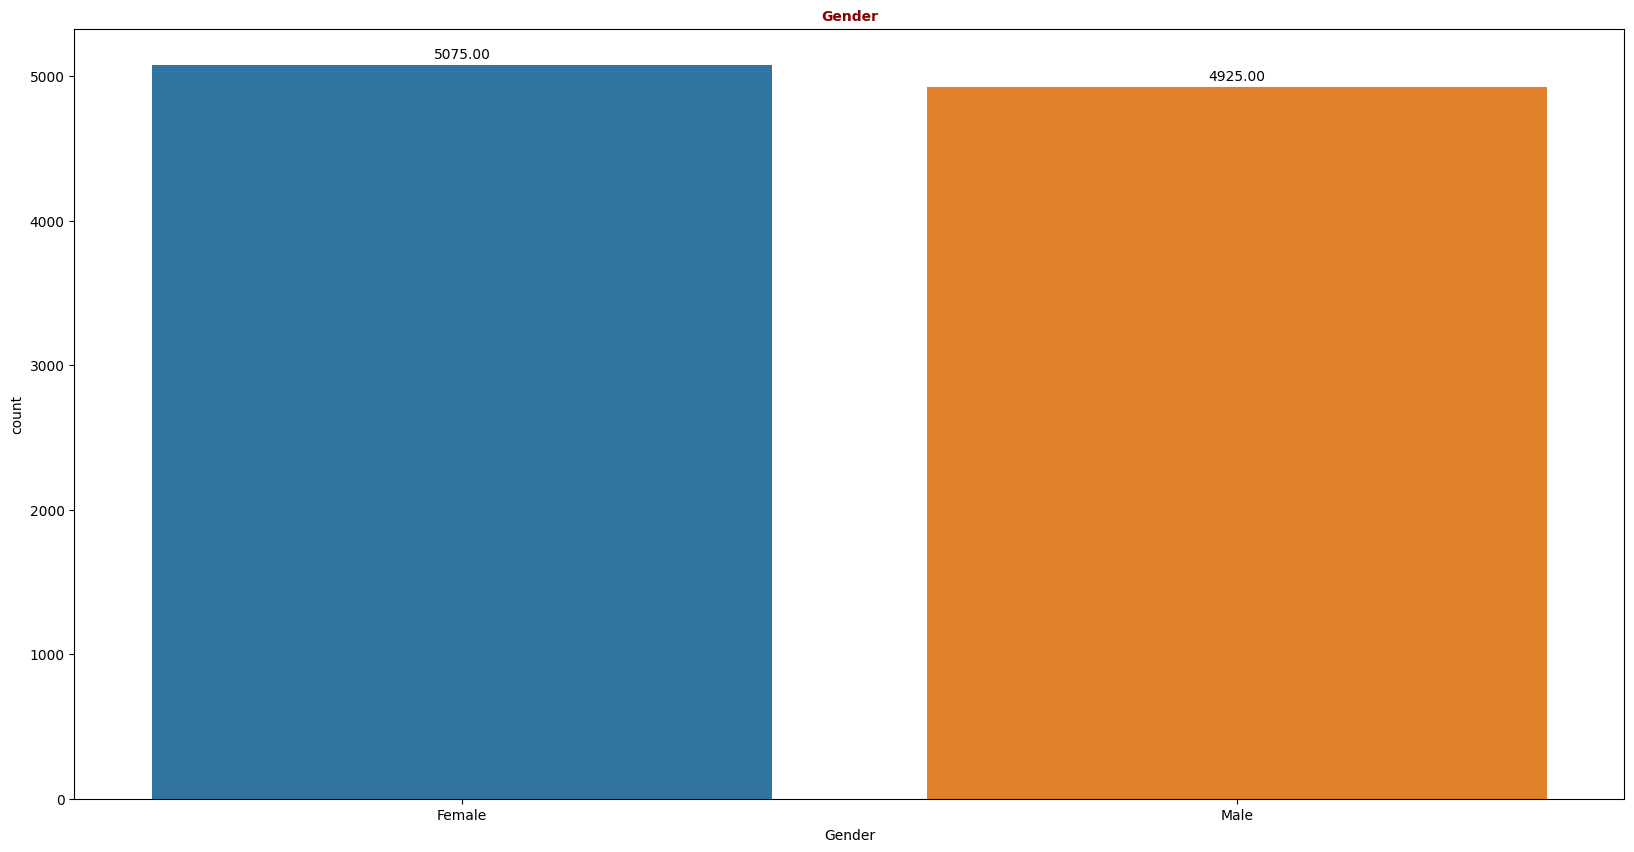

In [17]:
#Gender count plot

fig,ax = plt.subplots(figsize = (20,10))
sns.countplot(df, x = "Gender", ax = ax,order=df['Gender'].value_counts().index)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text=f"{height:.2f}",  # Format to two decimal places
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center',
                va='bottom')
ax.set_title("Gender", fontsize = 10, fontweight = "bold", color = "darkred")
fig.show()

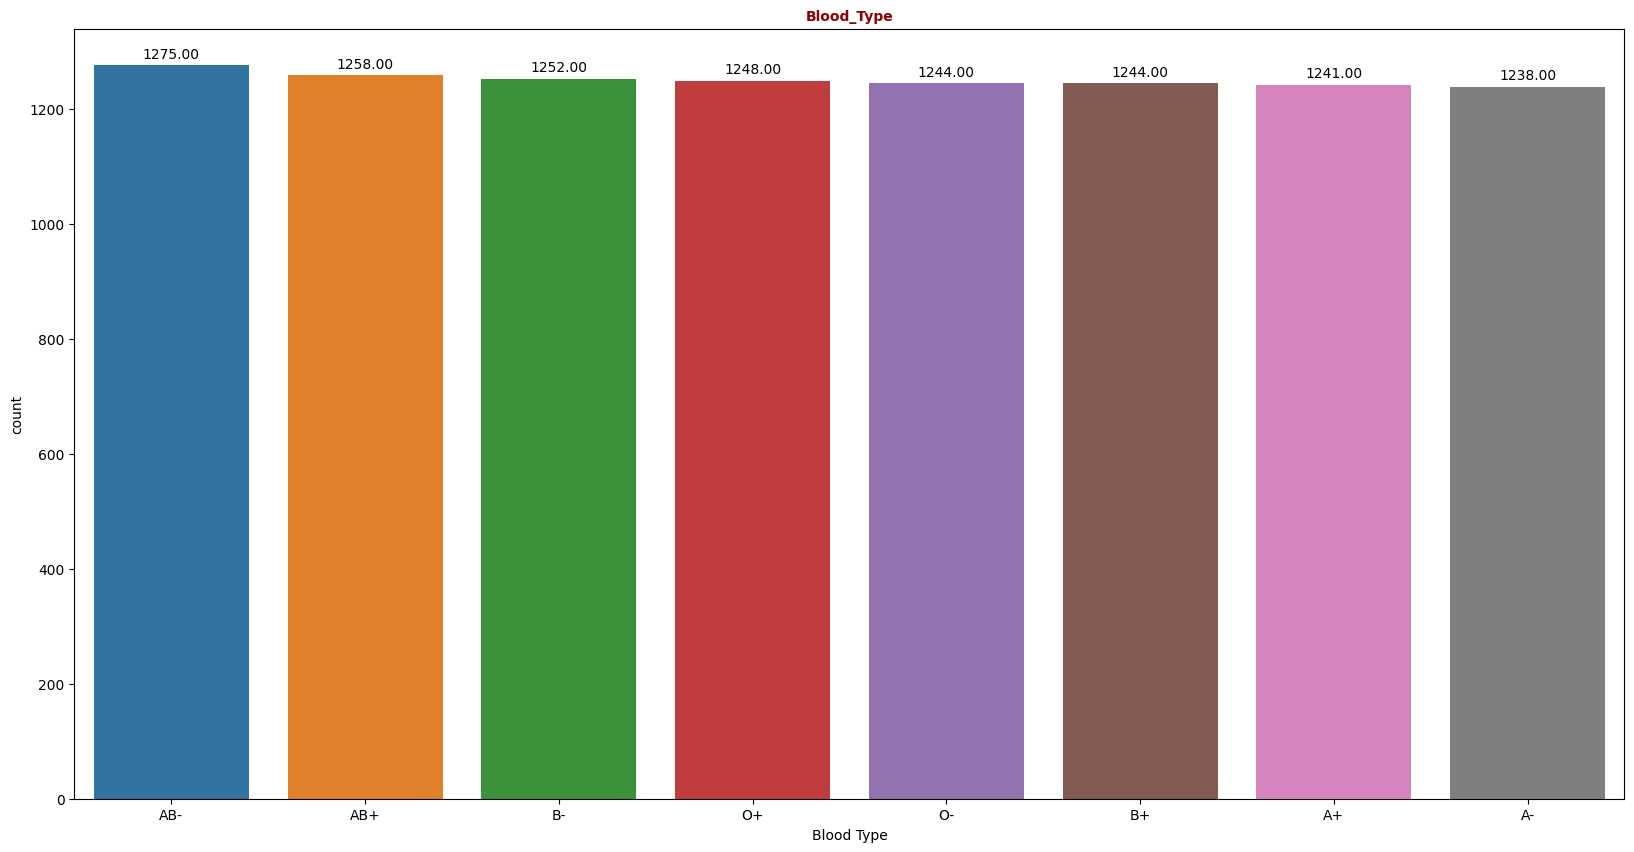

In [18]:
#Blood_Type

fig,ax = plt.subplots(figsize = (20,10))
sns.countplot(df, x = "Blood Type", ax = ax,order=df['Blood Type'].value_counts().index)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text=f"{height:.2f}",  # Format to two decimal places
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center',
                va='bottom')
ax.set_title("Blood_Type", fontsize = 10, fontweight = "bold", color = "darkred")
fig.show()

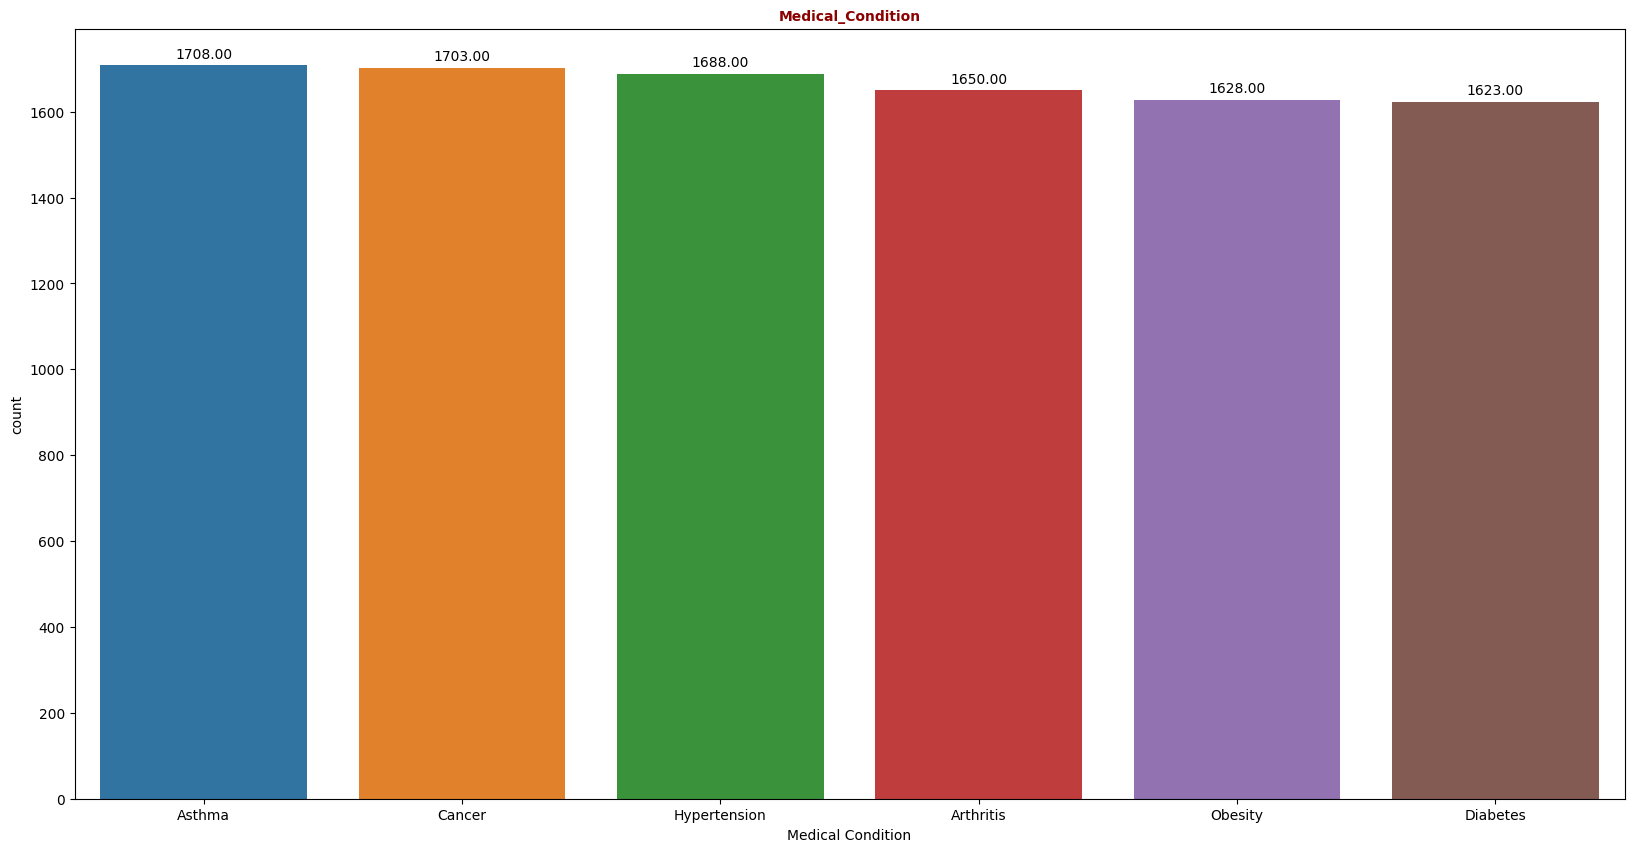

In [19]:
#Blood_Type

fig,ax = plt.subplots(figsize = (20,10))
sns.countplot(df, x = "Medical Condition", ax = ax,order=df['Medical Condition'].value_counts().index)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text=f"{height:.2f}",  # Format to two decimal places
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center',
                va='bottom')
ax.set_title("Medical_Condition", fontsize = 10, fontweight = "bold", color = "darkred")
fig.show()


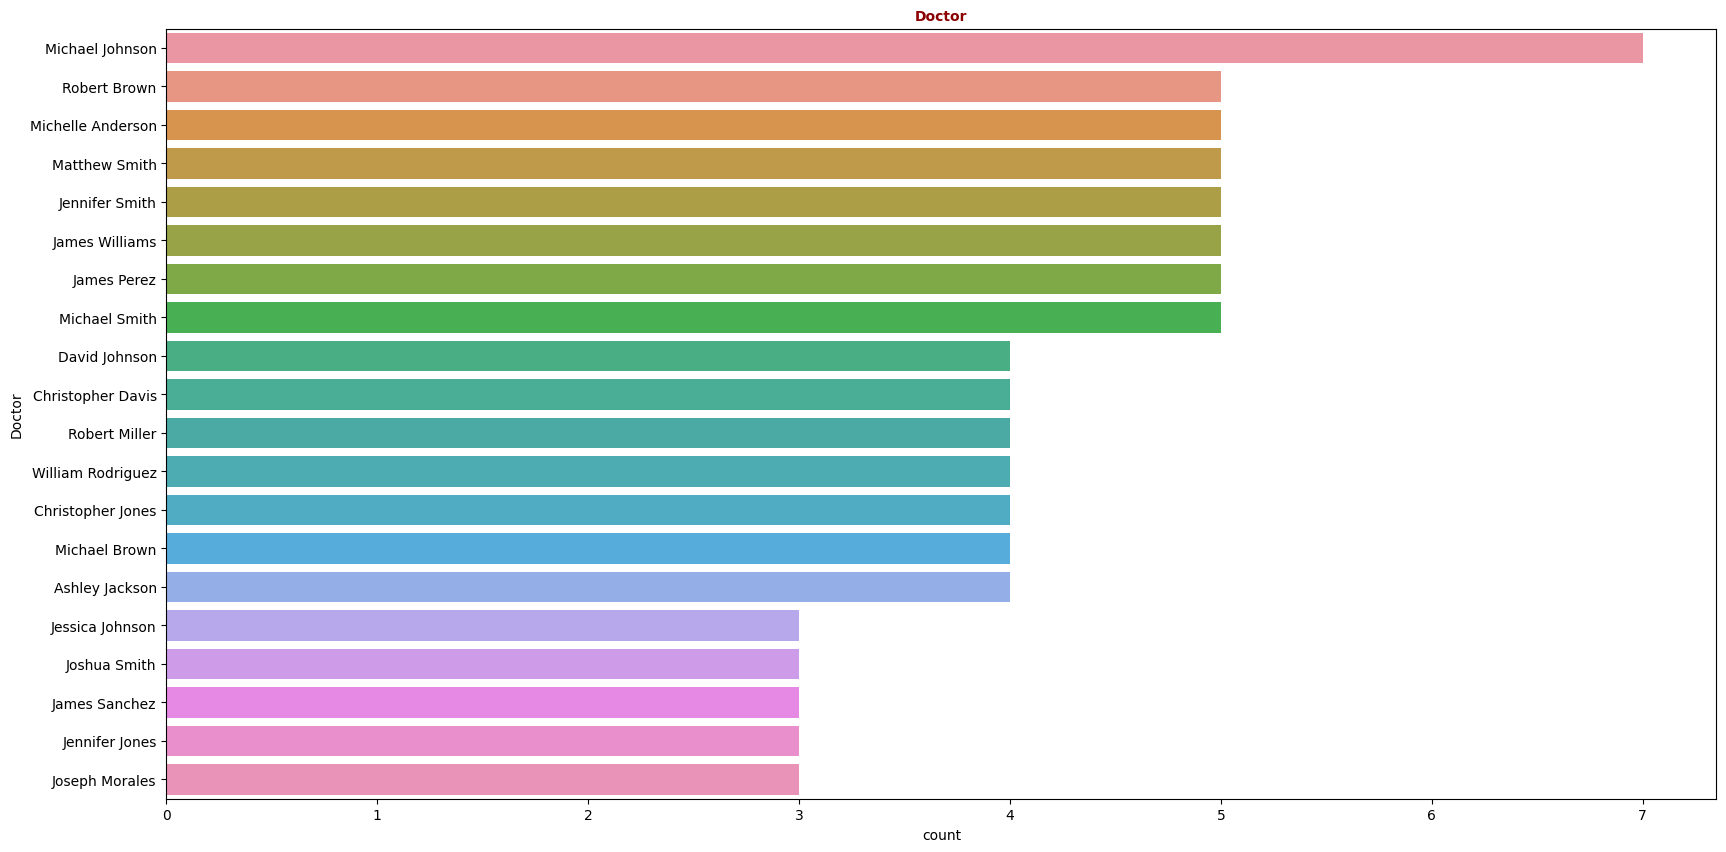

In [20]:
#Doctor

fig,ax = plt.subplots(figsize = (20,10))
sns.countplot(df, y = "Doctor", ax = ax,order=df['Doctor'].value_counts().iloc[:20].index)
ax.set_title("Doctor", fontsize = 10, fontweight = "bold", color = "darkred")
fig.show()

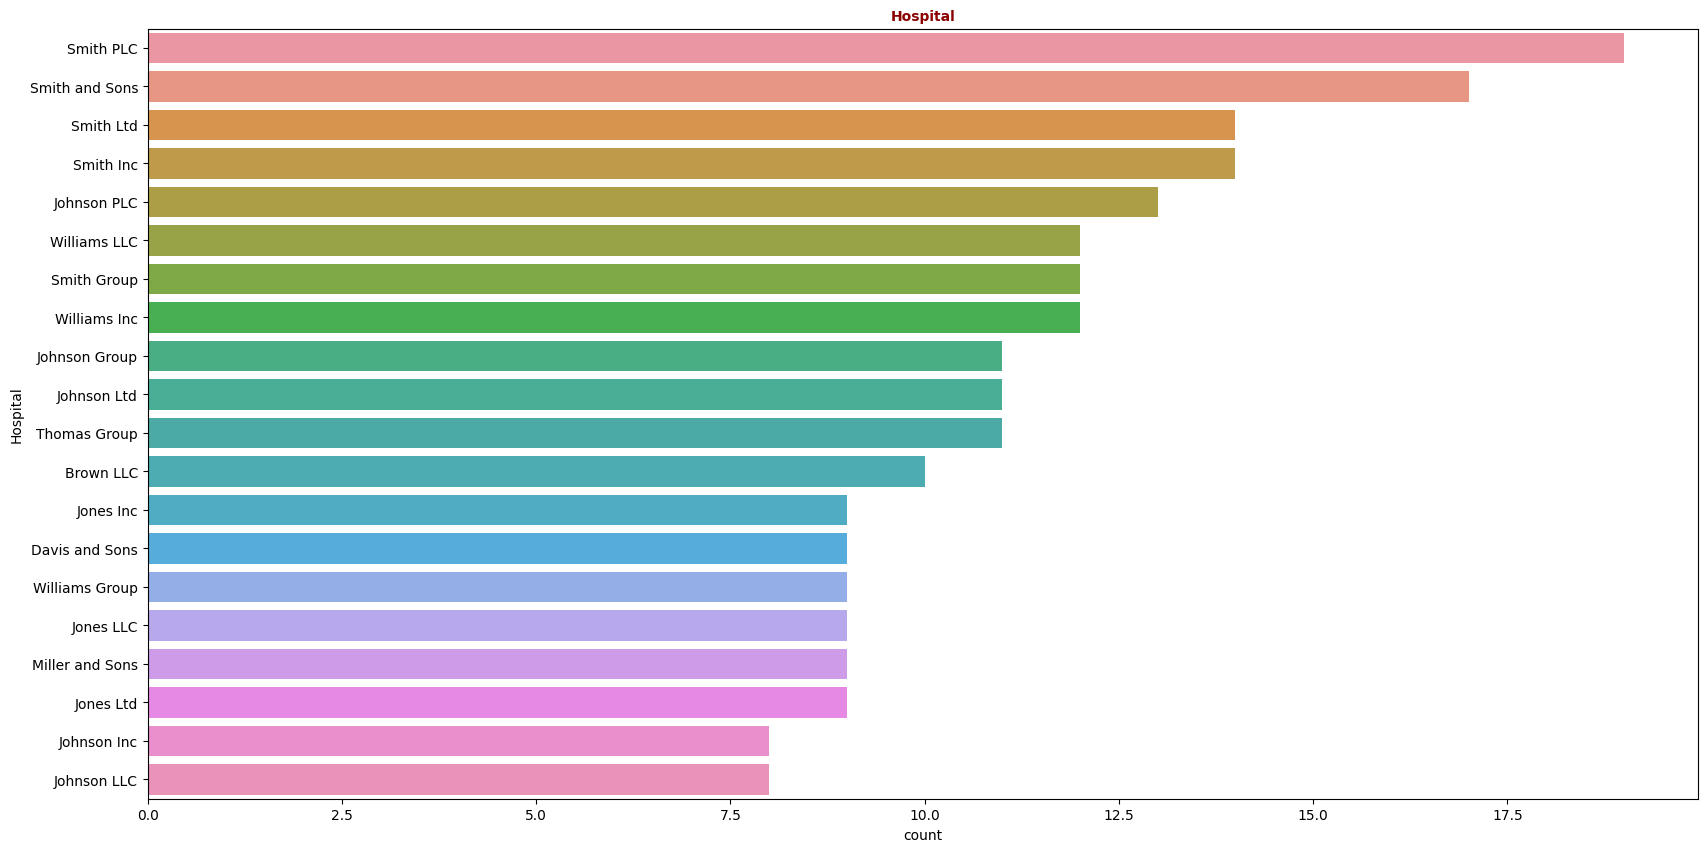

In [21]:
#Hospital

fig,ax = plt.subplots(figsize = (20,10))
sns.countplot(df, y = "Hospital", ax = ax,order=df['Hospital'].value_counts().iloc[:20].index)
ax.set_title("Hospital", fontsize = 10, fontweight = "bold", color = "darkred")
fig.show()

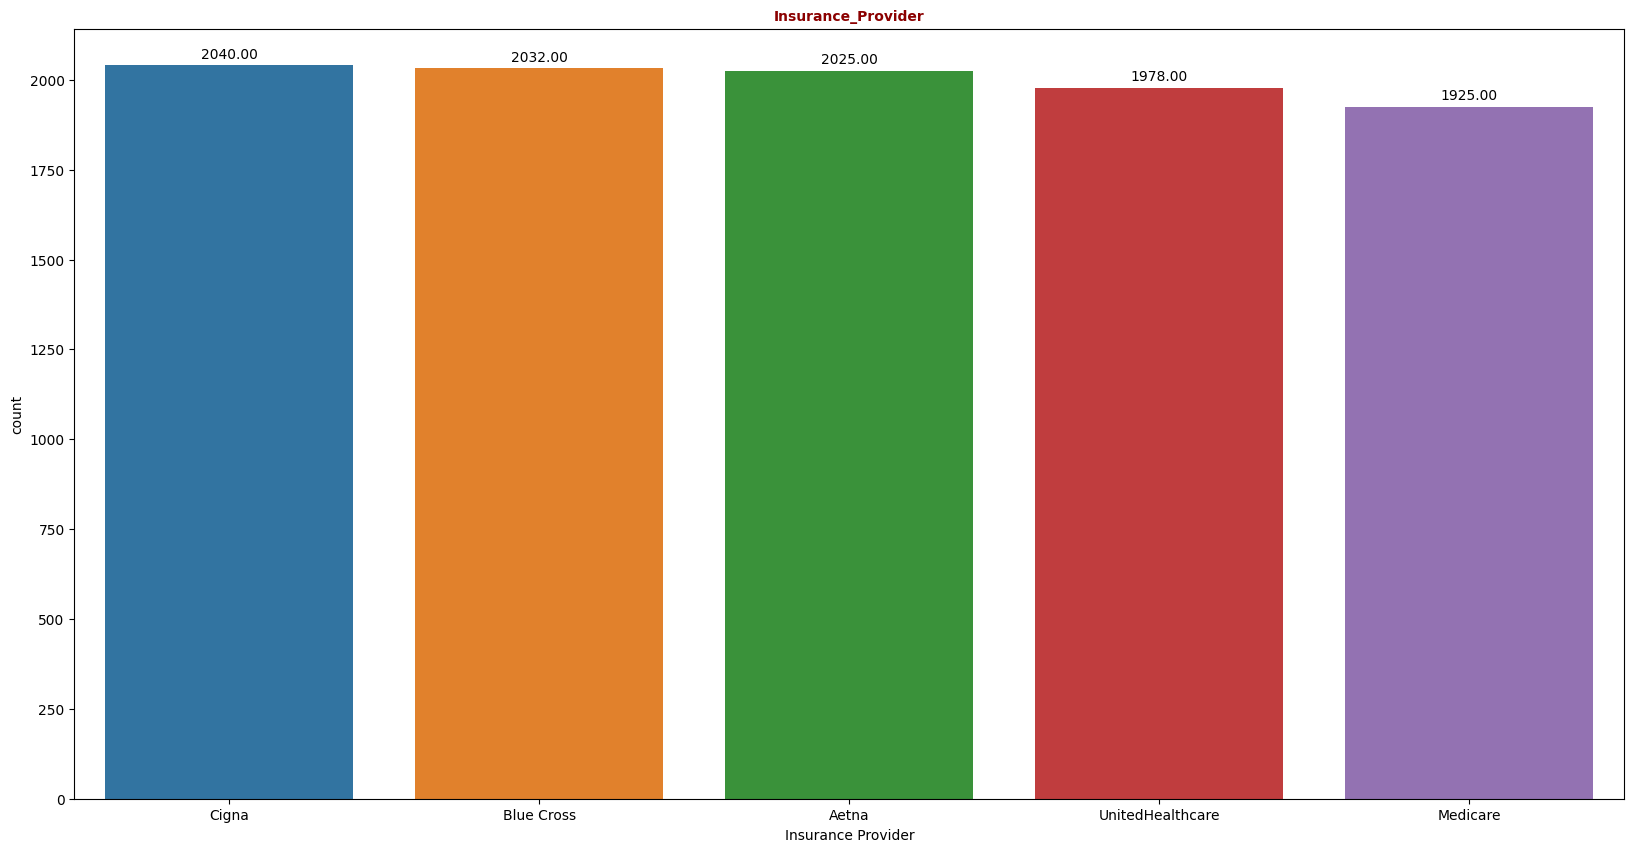

In [22]:
#Insurance_Provider

fig,ax = plt.subplots(figsize = (20,10))
sns.countplot(df, x = "Insurance Provider", ax = ax,order=df['Insurance Provider'].value_counts().index)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text=f"{height:.2f}",  # Format to two decimal places
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center',
                va='bottom')
ax.set_title("Insurance_Provider", fontsize = 10, fontweight = "bold", color = "darkred")
fig.show()

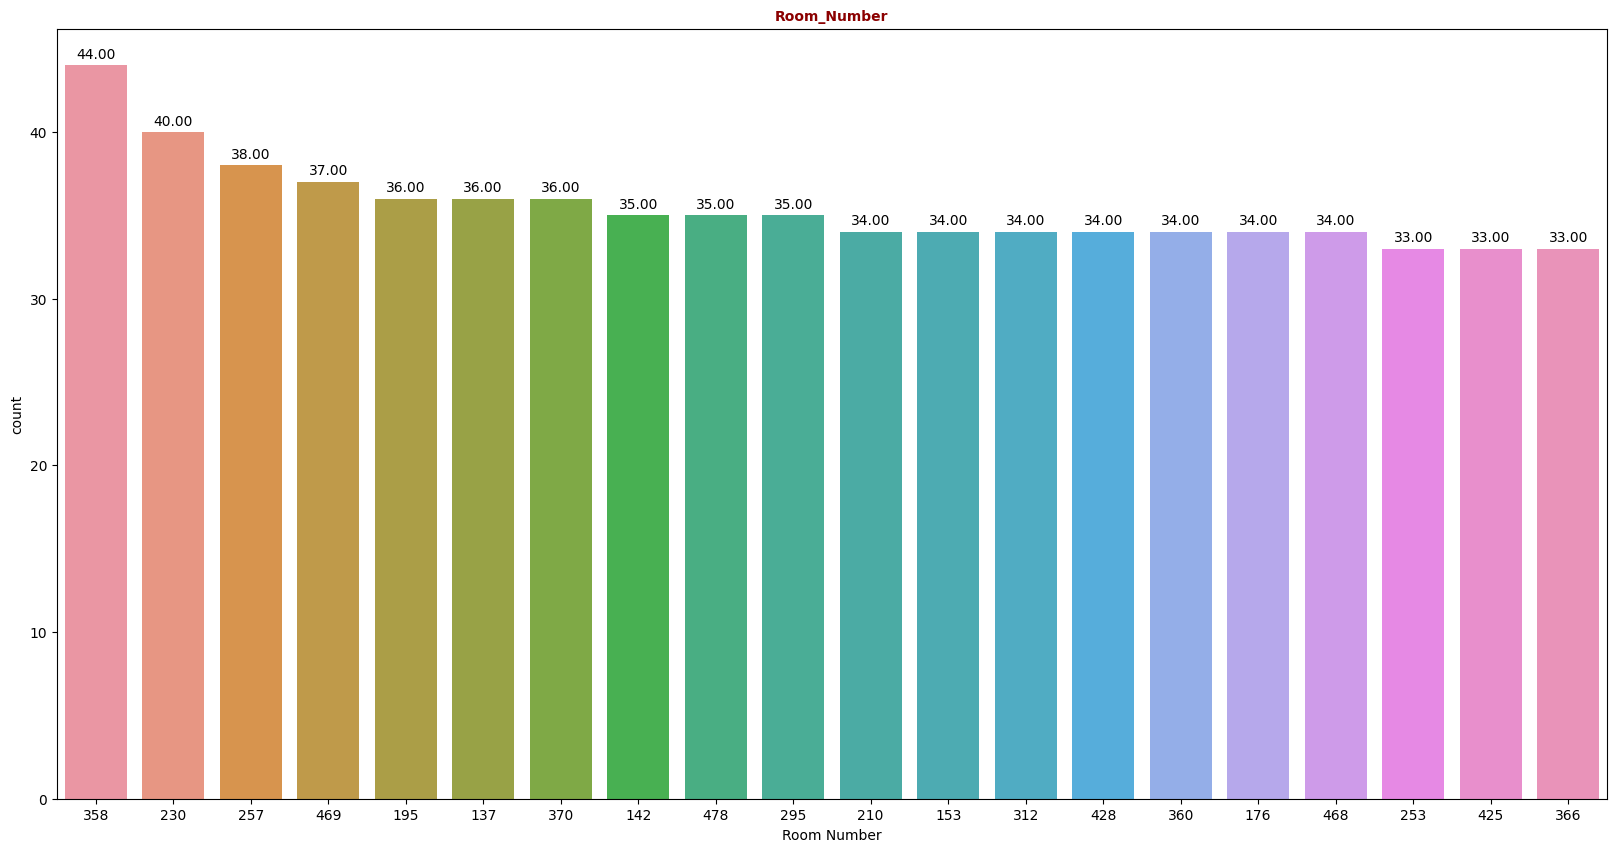

In [23]:
#Room_Number

fig,ax = plt.subplots(figsize = (20,10))
sns.countplot(df, x = "Room Number", ax = ax,order=df['Room Number'].value_counts().iloc[:20].index)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text=f"{height:.2f}",  # Format to two decimal places
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center',
                va='bottom')
ax.set_title("Room_Number", fontsize = 10, fontweight = "bold", color = "darkred")
fig.show()

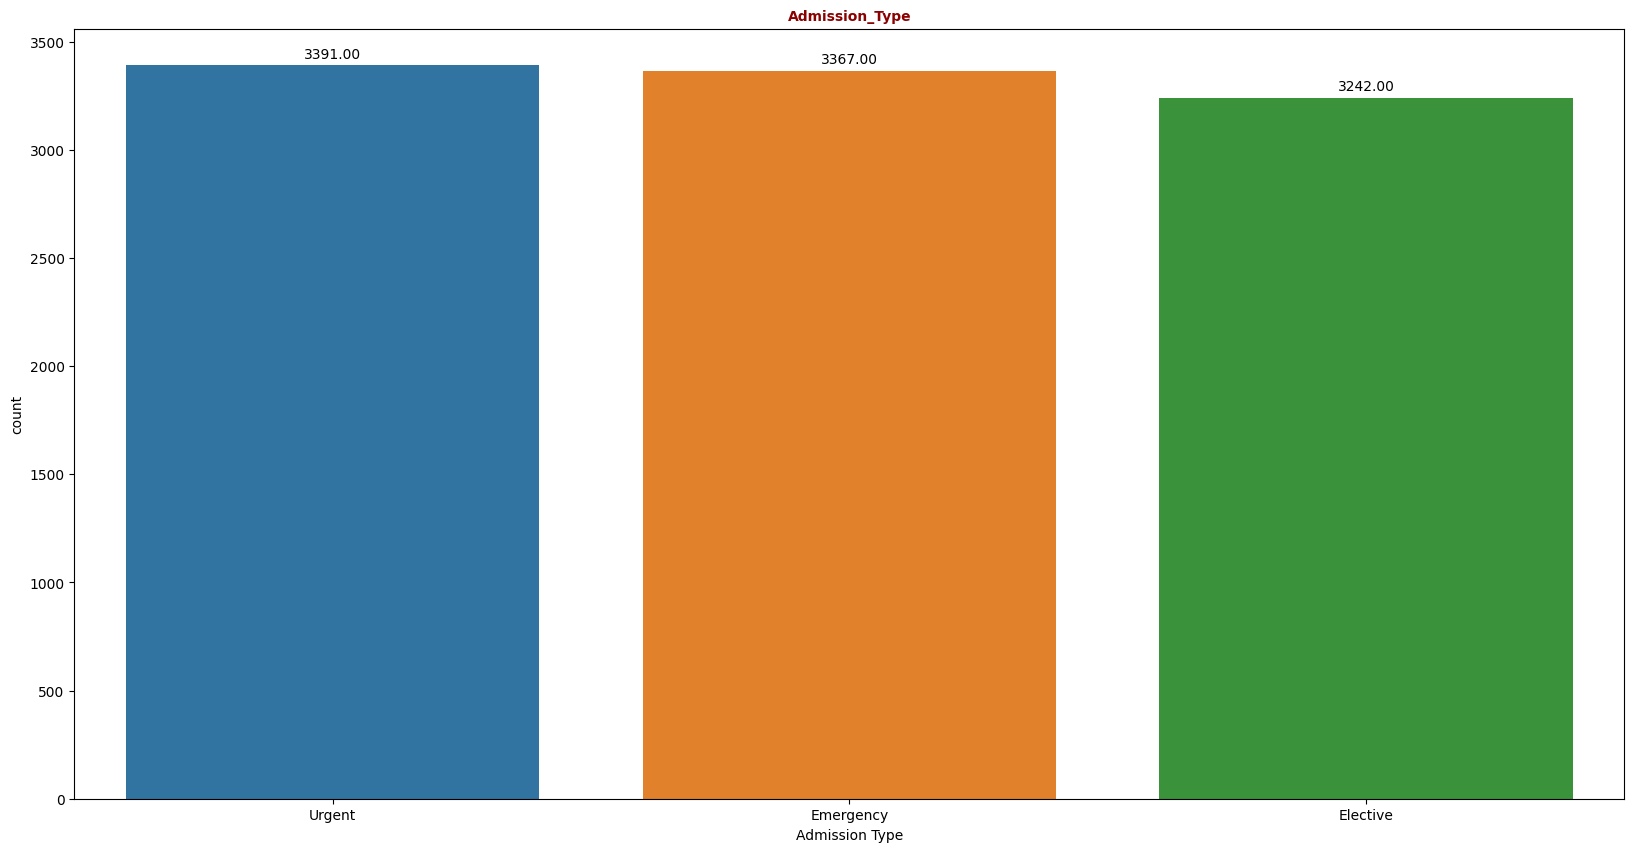

In [24]:
#Admission_Type

fig,ax = plt.subplots(figsize = (20,10))
sns.countplot(df, x = "Admission Type", ax = ax,order=df['Admission Type'].value_counts().index)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text=f"{height:.2f}",  # Format to two decimal places
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center',
                va='bottom')
ax.set_title("Admission_Type", fontsize = 10, fontweight = "bold", color = "darkred")
fig.show()

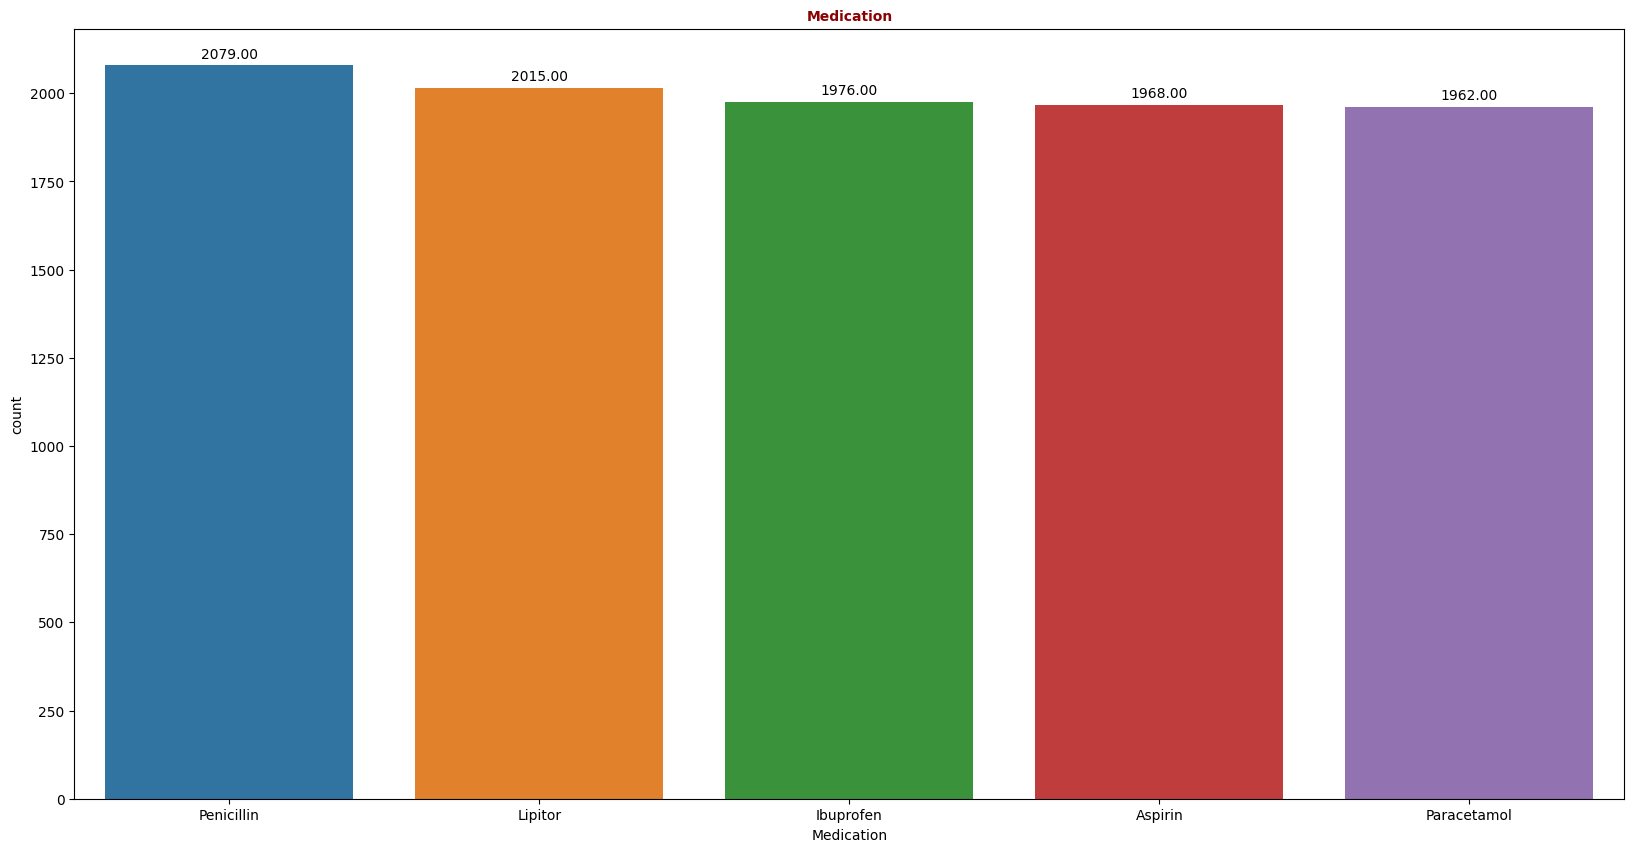

In [25]:
#Medication

fig,ax = plt.subplots(figsize = (20,10))
sns.countplot(df, x = "Medication", ax = ax,order=df['Medication'].value_counts().index)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text=f"{height:.2f}",  # Format to two decimal places
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center',
                va='bottom')
ax.set_title("Medication", fontsize = 10, fontweight = "bold", color = "darkred")
fig.show()

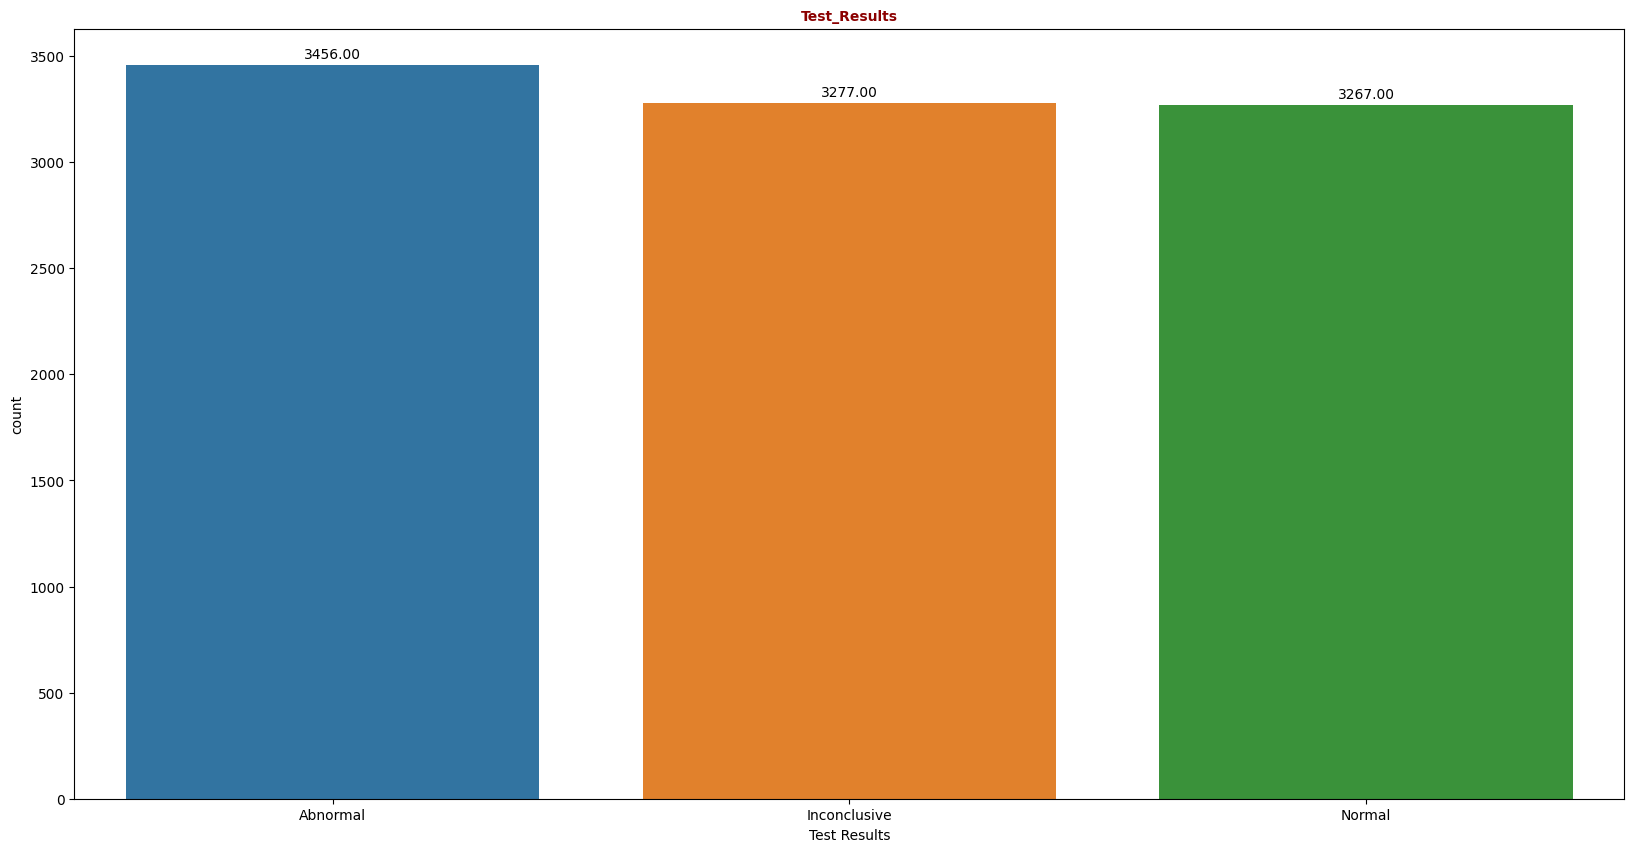

In [26]:
#Test_Results

fig,ax = plt.subplots(figsize = (20,10))
sns.countplot(df, x = "Test Results", ax = ax,order=df['Test Results'].value_counts().index)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text=f"{height:.2f}",  # Format to two decimal places
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center',
                va='bottom')
ax.set_title("Test_Results", fontsize = 10, fontweight = "bold", color = "darkred")
fig.show()

Bi-variate

In [27]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

In [28]:
df['Admission datee'] = df['Date of Admission'].dt.weekday
df['Admission month'] = df['Date of Admission'].dt.month
df['Days hospitalized'] = df['Discharge Date'] - df['Date of Admission']
df['day of week'] = df['Date of Admission'].dt.day_of_week
df['Discharge month'] = df['Discharge Date'].dt.day_of_week
df['Discharge Datee'] = df['Discharge Date'].dt.weekday

In [29]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,...,Admission Type,Discharge Date,Medication,Test Results,Admission datee,Admission month,Days hospitalized,day of week,Discharge month,Discharge Datee
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,...,Elective,2022-12-01,Aspirin,Inconclusive,3,11,14 days,3,3,3
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,...,Emergency,2023-06-15,Lipitor,Normal,3,6,14 days,3,3,3
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,...,Emergency,2019-02-08,Lipitor,Normal,2,1,30 days,2,4,4
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,...,Urgent,2020-05-03,Penicillin,Abnormal,5,5,1 days,5,6,6
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,...,Urgent,2021-08-02,Paracetamol,Normal,4,7,24 days,4,0,0


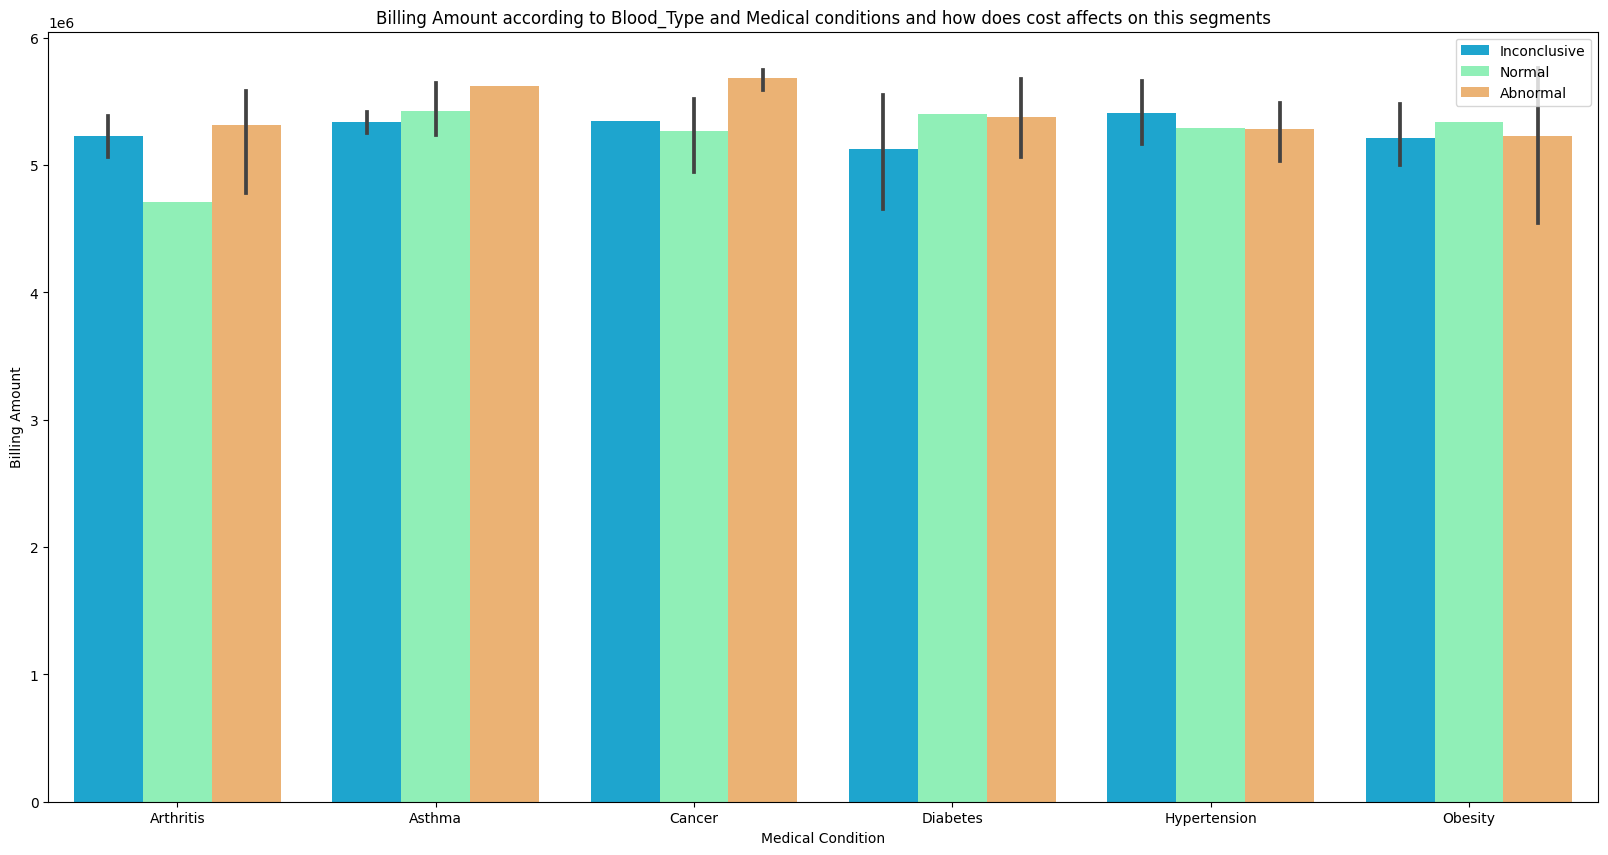

In [30]:
# Billing Amount according to Medical Condition and Test Results
df1 = df.groupby(['Blood Type', 'Medical Condition'])[['Billing Amount']].sum().reset_index()
plt.figure(figsize=(20,10))
sns.barplot(x=df1['Medical Condition'], y=df1['Billing Amount'], hue=df['Test Results'], palette="rainbow")
plt.title("Billing Amount according to Blood_Type and Medical conditions and how does cost affects on this segments")
plt.legend(loc='upper right')
plt.ylabel("Billing Amount")
plt.xticks(rotation=0, fontsize = 10)
plt.show()

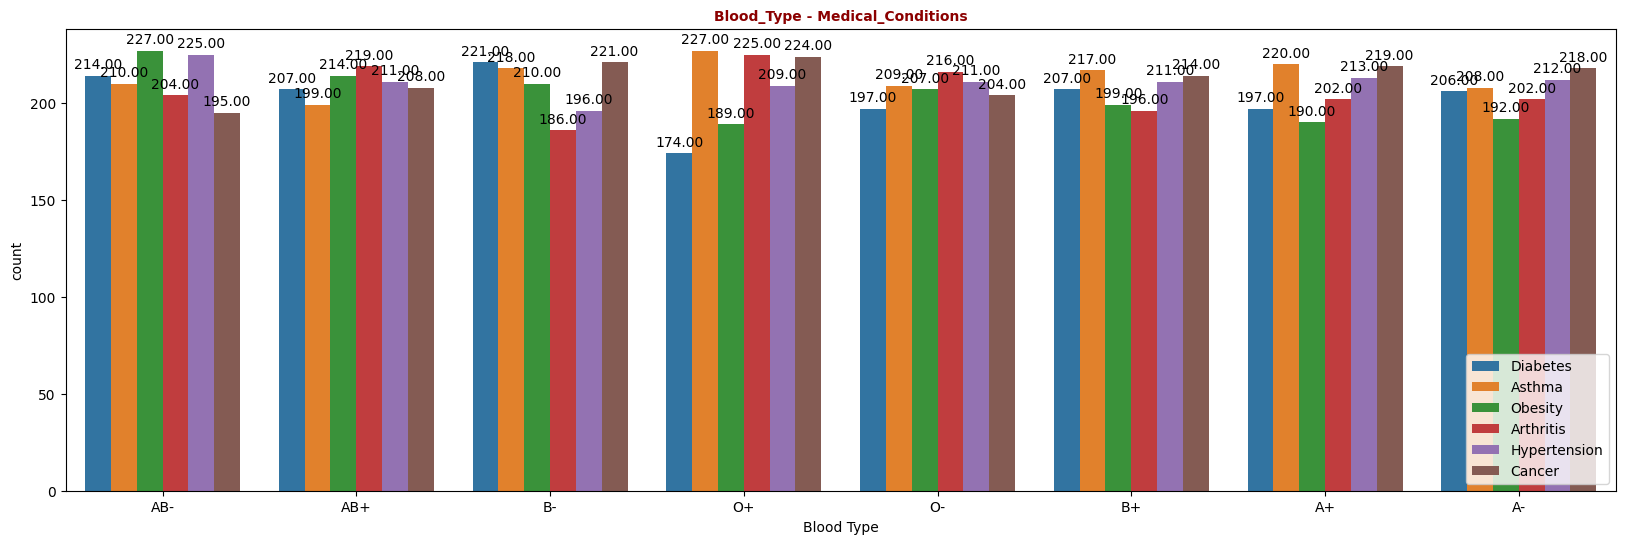

In [31]:
#Blood_Type - Medical_Conditions

fig,ax = plt.subplots(figsize = (20,6))
sns.countplot(df, x = "Blood Type", hue=df['Medical Condition'],ax = ax,order=df['Blood Type'].value_counts().index)
plt.legend(loc='lower right')
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text=f"{height:.2f}",  # Format to two decimal places
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center',
                va='bottom')
ax.set_title("Blood_Type - Medical_Conditions", fontsize = 10, fontweight = "bold", color = "darkred")
fig.show()

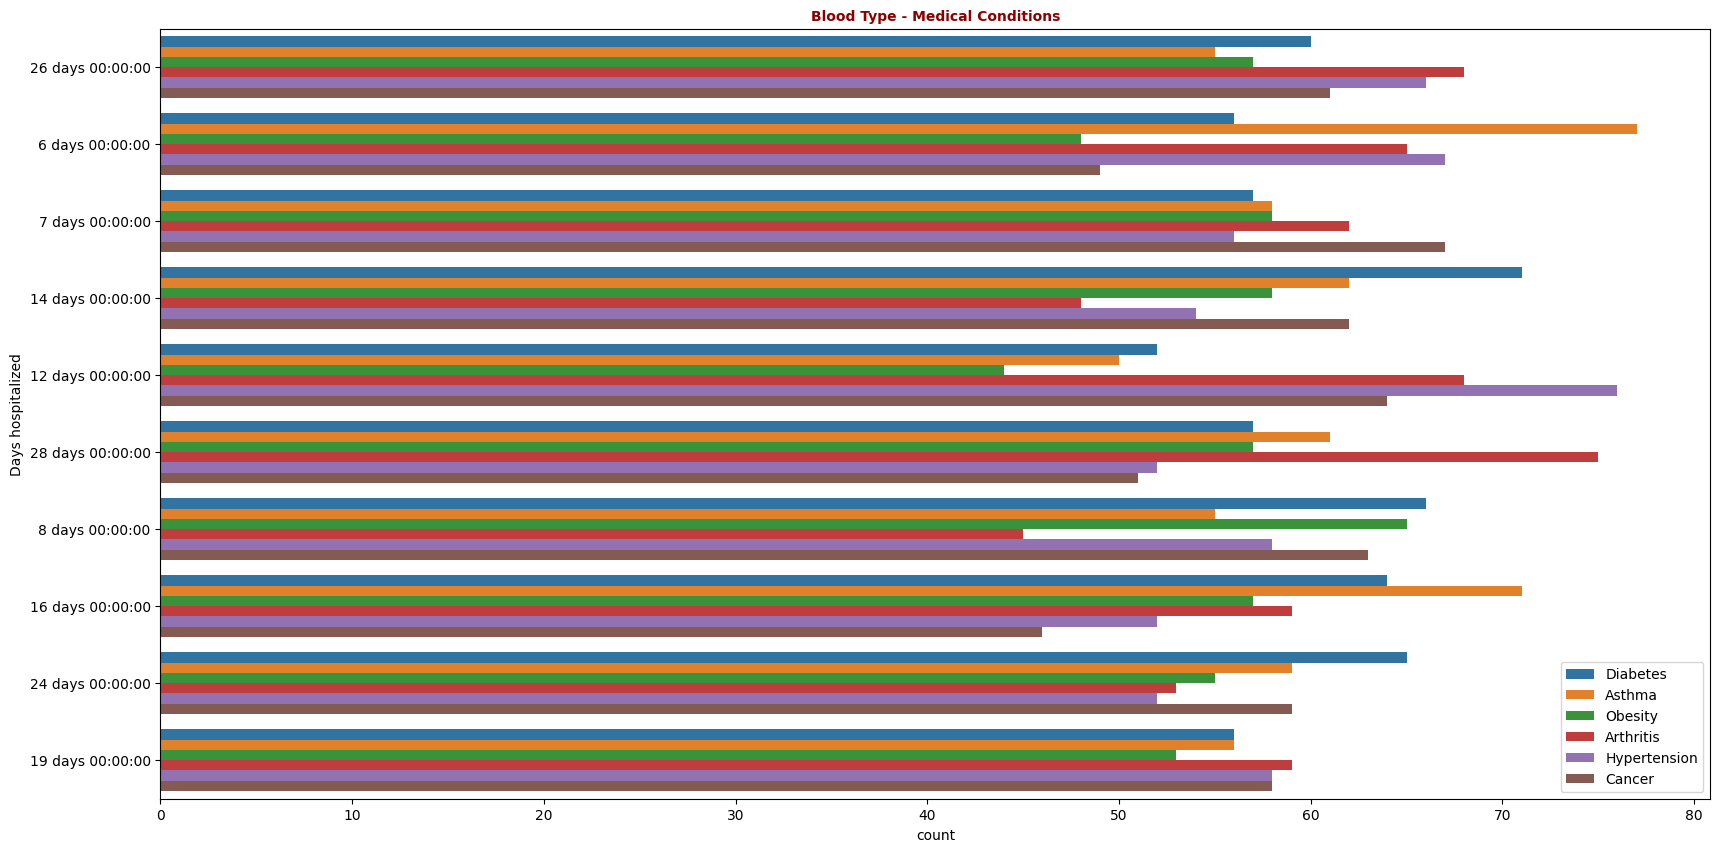

In [32]:
#Days_Hospitalized - Medical_Conditions

fig,ax = plt.subplots(figsize = (20,10))
sns.countplot(df, y = "Days hospitalized", hue=df['Medical Condition'],ax = ax,order=df['Days hospitalized'].value_counts().iloc[:10].index)
plt.legend(loc='lower right')
ax.set_title("Blood Type - Medical Conditions", fontsize = 10, fontweight = "bold", color = "darkred")
fig.show()

## Model building

convert the timedelta64 columns to days:

In [43]:
import pandas as pd

# Load your data into a DataFrame
df = pd.read_csv('/content/healthcare_dataset.csv')

# Convert timedelta64 columns to days
for col in df.columns:
    if df[col].dtype == 'timedelta64[ns]':
        df[col] = df[col].dt.days

In [44]:
X = df.drop(columns=['Name','Date of Admission','Billing Amount', 'Discharge Date','Test Results'],axis=1)
y = df['Test Results']

In [45]:
# Do Label encoding on y label

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)

In [46]:
!pip install category_encoders


In [47]:
# Import category encoder and perfom on X data

import category_encoders as ce
X = ce.TargetEncoder(smoothing=0).fit_transform(X,y)

In [48]:
#Train-test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape)

(8000, 10) (2000, 10)


In [49]:
#Standarscaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [52]:
X_test.shape

(2000, 10)

In [53]:
y_train.shape

(8000,)

In [54]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [61]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [62]:
# making dictionary of these objects
clfs = {
    'SVC':svc,
    'KN':knc,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [63]:


def train_classifier(clf,x_train,x_test,y_train,y_test):
  clf.fit(x_train,y_train)
  y1 = clf.predict(x_test)
  accuracy=accuracy_score(y_test,y1)
  precision = precision_score(y_test,y1,average='weighted')

  return accuracy,precision



In [64]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
  current_accuracy,current_precision = train_classifier(clf,X_train,X_test,y_train,y_test)

  print('for',name)
  print('accuracy',current_accuracy)
  print('precision',current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

for SVC
accuracy 0.3185
precision 0.3167721654053044
for KN
accuracy 0.3425
precision 0.34079274710172686
for DT
accuracy 0.349
precision 0.34661058917766047
for LR
accuracy 0.3435
precision 0.33566977846887697
for RF
accuracy 0.3545
precision 0.35431313125000463
for AdaBoost
accuracy 0.341
precision 0.34039724316791886
for BgC
accuracy 0.3525
precision 0.3519556464931733
for ETC
accuracy 0.338
precision 0.3373372162292038
for GBDT
accuracy 0.347
precision 0.3482115348417859
for xgb
accuracy 0.3395
precision 0.3398214717262721


In [66]:
# converting the above result into dataframe
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

performance_df


,Algorithm,Accuracy,Precision
4,RF,0.3545,0.354313
6,BgC,0.3525,0.351956
8,GBDT,0.3470,0.348212
2,DT,0.3490,0.346611
1,KN,0.3425,0.340793
5,AdaBoost,0.3410,0.340397
9,xgb,0.3395,0.339821
7,ETC,0.3380,0.337337
3,LR,0.3435,0.335670
0,SVC,0.3185,0.316772
